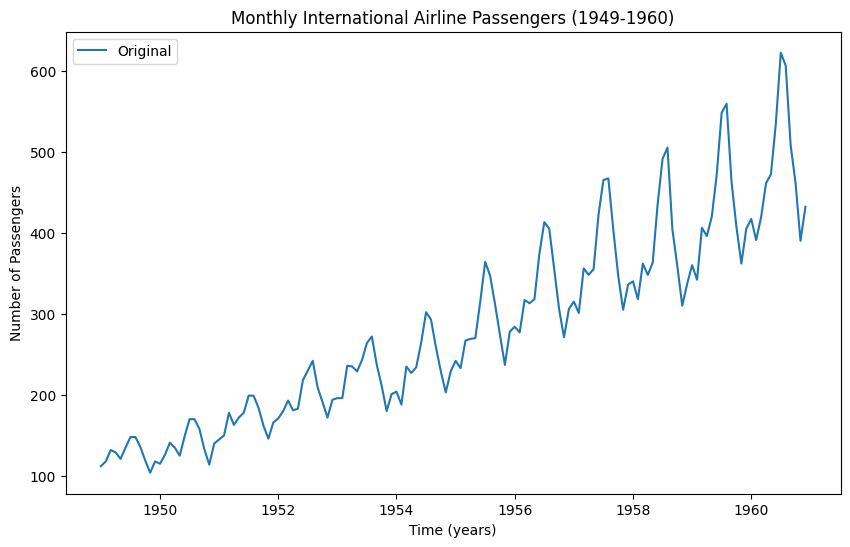

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.regression.rolling import RollingOLS

# Load AirPassengers dataset
air_passengers = sm.datasets.get_rdataset("AirPassengers").data
air_passengers['logValue'] = np.log(air_passengers['value'])

# Plot original time series
plt.figure(figsize=(10, 6))
plt.plot(air_passengers['time'], air_passengers['value'], label='Original')
plt.title('Monthly International Airline Passengers (1949-1960)')
plt.xlabel('Time (years)')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

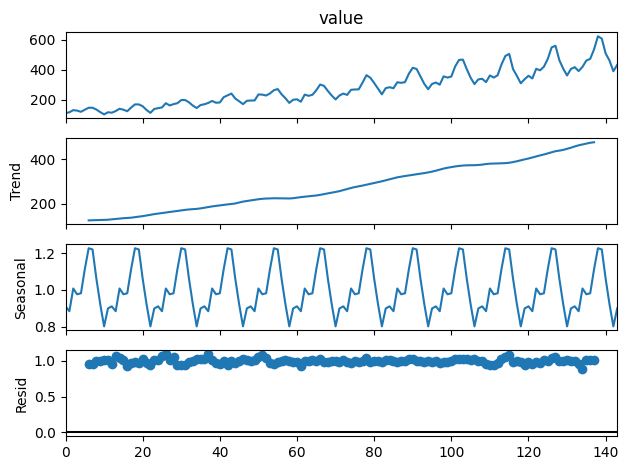

In [2]:
# Decompose the time series
result = seasonal_decompose(air_passengers['value'], model='multiplicative', period=12)
result.plot()
plt.show()

In [48]:
# Create a DataFrame with a column for the index
ts_air_passengers = pd.DataFrame({'index': range(1, len(air_passengers) + 1),
                                  'value': air_passengers['value'],
                                  'logValue': air_passengers['logValue']})
ts_air_passengers.set_index('index', inplace=True)  # Set the index correctly

# Create trigonometric features
ts_air_passengers['sin_2pi_index_12'] = np.sin(2 * np.pi * ts_air_passengers.index / 12)
ts_air_passengers['cos_2pi_index_12'] = np.cos(2 * np.pi * ts_air_passengers.index / 12)

# Define the models
models = {
    'Yt = Tt + Rt': 'value ~ index + I(index**2)',
    'Yt = St (h=1) + Rt': 'value ~ sin_2pi_index_12 + cos_2pi_index_12',
    'Yt = Tt + St (h=1) + Rt': 'value ~ index + I(index**2) + sin_2pi_index_12 + cos_2pi_index_12'
}

models.items()

# # Fit the models and plot the results
# for model_name, formula in models.items():
#     ts_air_passengers[f'{model_name}_fitted'] = np.nan

#     for i in range(12, len(ts_air_passengers) + 1):
#         data_window = ts_air_passengers.loc[:i - 1]
#         model_formula = formula.replace("index", "Q('index')").replace("I(index**2)", "Q('I(index**2)')")
#         model = sm.OLS.from_formula(model_formula, data=data_window)
#         model_fit = model.fit()

#         # Update fitted values directly in the DataFrame using loc
#         ts_air_passengers.loc[i, f'{model_name}_fitted'] = model_fit.predict(data_window.iloc[-1])



dict_items([('Yt = Tt + Rt', 'value ~ index + I(index**2)'), ('Yt = St (h=1) + Rt', 'value ~ sin_2pi_index_12 + cos_2pi_index_12'), ('Yt = Tt + St (h=1) + Rt', 'value ~ index + I(index**2) + sin_2pi_index_12 + cos_2pi_index_12')])

In [17]:
ts_air_passengers.columns

Index(['index', 'value', 'logValue', 'sin_2pi_index_12', 'cos_2pi_index_12'], dtype='object')

In [ ]:
# Plot the results
plt.figure(figsize=(15, 10))

# Plot original values and fitted values
for i, model_name in enumerate(models.keys(), 1):
    plt.subplot(2, 3, i)
    plt.plot(ts_air_passengers['index'], ts_air_passengers['value'], label='Original')
    plt.plot(ts_air_passengers['index'], ts_air_passengers[model_name], label='Fitted', color='red')
    plt.title(model_name)
    plt.xlabel('Time (years)')
    plt.ylabel('Number of Passengers')
    plt.legend()

# Plot residuals
for i, model_name in enumerate(models.keys(), 1):
    plt.subplot(2, 3, i + 3)
    residuals = ts_air_passengers['value'] - ts_air_passengers[model_name]
    plt.plot(ts_air_passengers['index'], residuals, label='Residuals', color='green')
    plt.title(f'{model_name} - Residuals')
    plt.xlabel('Time (years)')
    plt.ylabel('Residuals')
    plt.legend()

plt.tight_layout()
plt.show()